# Introduction
The dataset shows the number of tests sold by london sight and the information of the competitiors and how far the london sites customers live from competitors. 

Goal is to find out whick competitor sites the customers will go if london site is closed.

The competitor columns presents the competitor sites. 

dis_fct columns shows the people who tested at london live how far from the london site.

dis_to_comp columns presents the distance to competitor sites of the cust who tested in london croydon or are current customers of the london site.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
pd.options.plotting.backend = "plotly"

In [1]:
df= (
    pd.read_csv("/Users/waleedidrees/Dropbox/Python_Projects/My_Projects/regression_models/comp.csv", index_col=0)    
    )
df.head()

NameError: name 'pd' is not defined

In [ ]:
df["tot_tests"] = df.groupby(["location","competitor" ], as_index=False).agg(tot_tests = ("no_of_tests", "sum"))["tot_tests"][0]
df= df[["location", "competitor", "dis_to_london", "dis_to_comp", "no_of_tests", "tot_tests","dis_othersite" ]].copy()
df.head()

,location,competitor,dis_to_london,dis_to_comp,no_of_tests,tot_tests,dis_othersite
81096,london,rand_croyden,50-75,50-100,1,2986,51.445184
81097,london,rand_croyden,25-50,10-50,1,2986,47.504045
81098,london,rand_croyden,>100,>100,1,2986,149.989915
81099,london,rand_croyden,50-75,50-100,1,2986,64.809143
81100,london,rand_croyden,50-75,50-100,1,2986,65.626448


In [ ]:
df= df.assign(
    dis_to_comp= 
    np.where ( (df.dis_othersite >= 0) & (df.dis_othersite <= 2.5), "0-2.5",    
    np.where ( (df.dis_othersite >2.5) & (df.dis_othersite <= 5), "2.5-5",    
    np.where ( (df.dis_othersite >5) & (df.dis_othersite <= 7.5), "5-7.5",
    np.where ( (df.dis_othersite >7.5) & (df.dis_othersite <= 10), "7.5-10",
    np.where ( (df.dis_othersite >10) & (df.dis_othersite <= 25), "10-25",
    np.where ( (df.dis_othersite >5) & (df.dis_othersite <= 50), "25-50",
    np.where ( (df.dis_othersite >5) & (df.dis_othersite <= 75), "50-75",
    np.where ( (df.dis_othersite >5) & (df.dis_othersite <= 7.5), "75-100", ">100"  
    )))))))),    
).drop(columns= "dis_othersite")
df

,location,competitor,dis_to_london,dis_to_comp,no_of_tests,tot_tests
81096,london,rand_croyden,50-75,50-75,1,2986
81097,london,rand_croyden,25-50,25-50,1,2986
81098,london,rand_croyden,>100,>100,1,2986
81099,london,rand_croyden,50-75,50-75,1,2986
81100,london,rand_croyden,50-75,50-75,1,2986
...,...,...,...,...,...,...
131744,london,Other_finsbury,10-25,2.5-5,1,2986
131745,london,Other_finsbury,10-25,2.5-5,1,2986
131746,london,Other_finsbury,25-50,25-50,1,2986
131747,london,Other_finsbury,25-50,25-50,2,2986


In [ ]:
df_prob_dis=(
    df    
    .query( "competitor == 'rand_croyden' ")
    .groupby(["location", "dis_to_london"], as_index=False)    
    .agg(tot_tests_lon = ("no_of_tests", "sum"))
    .assign(
        p_buy_dis_lon= lambda df_: df_.tot_tests_lon/df["tot_tests"].values[0],
        p_not_buy_lon= lambda df_:  1- df_.p_buy_dis_lon
        )
    .drop(columns= ["location"  ])    
    )
df_prob_dis.sort_values("dis_to_london")

,dis_to_london,tot_tests_lon,p_buy_dis_lon,p_not_buy_lon
0,0-2.5,752,0.251842,0.748158
1,10-25,271,0.090757,0.909243
2,2.5-5,912,0.305425,0.694575
3,25-50,75,0.025117,0.974883
4,5-7.5,619,0.207301,0.792699
5,50-75,19,0.006363,0.993637
6,7.5-10,322,0.107837,0.892163
7,75-100,9,0.003014,0.996986
8,>100,7,0.002344,0.997656


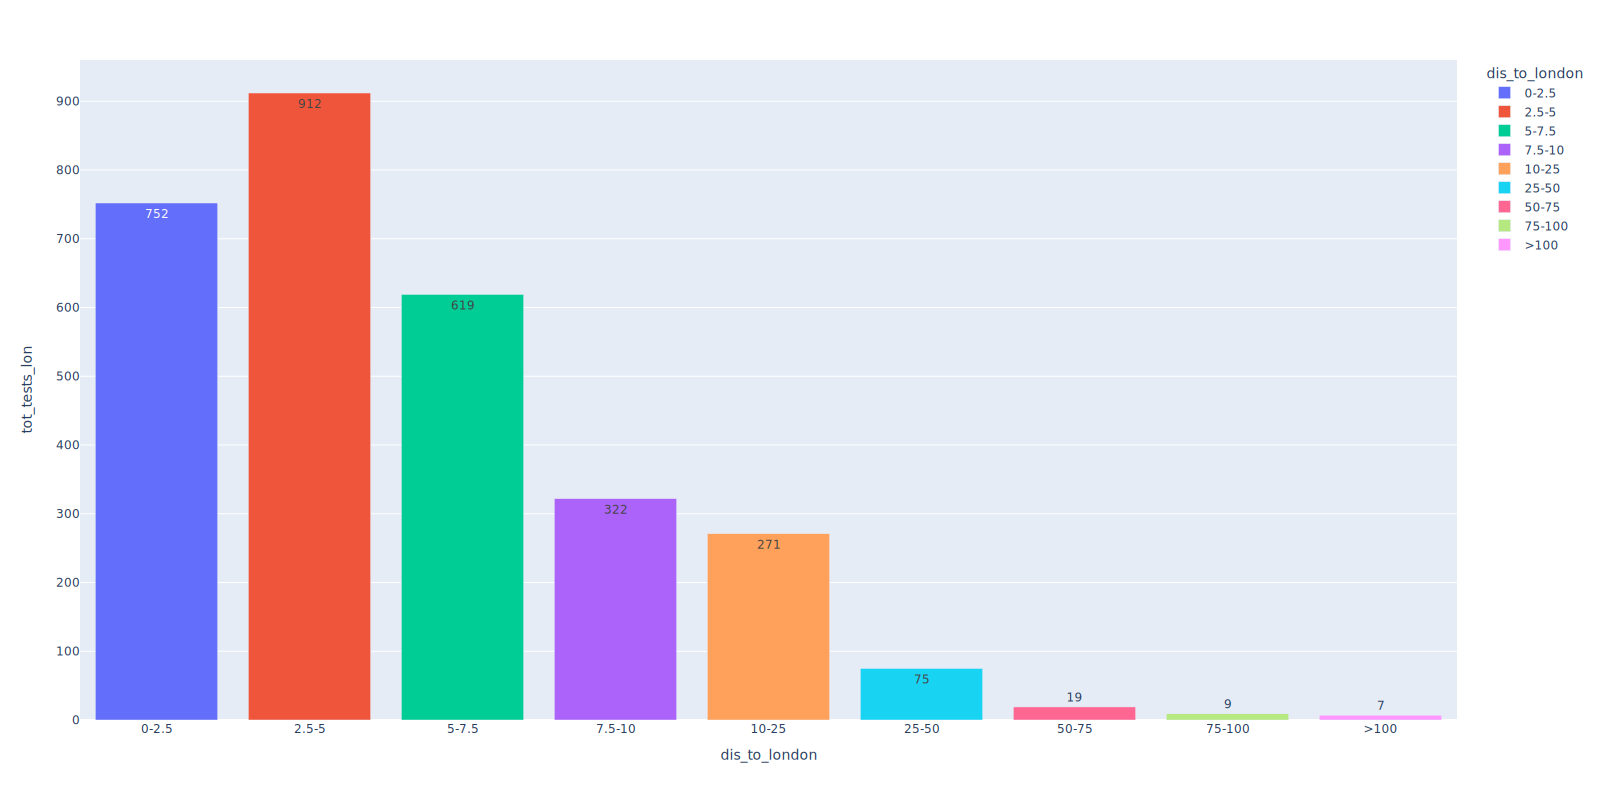

In [ ]:
(df_prob_dis.assign(
    dis_fcts= lambda df_:
    np.where ( df_.dis_to_london == "0-2.5", 2.5,    
    np.where ( df_.dis_to_london == "2.5-5", 5,    
    np.where ( df_.dis_to_london == "5-7.5", 7.5,
    np.where ( df_.dis_to_london == "7.5-10", 10,
    np.where ( df_.dis_to_london == "10-25", 25,
    np.where ( df_.dis_to_london == "25-50", 50,
    np.where ( df_.dis_to_london == "50-75", 75,
    np.where ( df_.dis_to_london == "75-100", 100, 110
    ))))))))
           )
    .sort_values(["dis_fcts"], ascending=True)
    .plot.bar(
    x="dis_to_london", 
    y= "tot_tests_lon", 
    color= "dis_to_london",
    text_auto = True,
    width= 1600, height = 800,    
    )
    ).show("svg")

In [ ]:
df_comp= (
    df.groupby(["competitor", "dis_to_comp"],as_index=False)
    .agg(tests= ("no_of_tests", "sum"))
    )    
df_comp

,competitor,dis_to_comp,tests
0,Other_finsbury,0-2.5,10
1,Other_finsbury,10-25,2611
2,Other_finsbury,2.5-5,34
3,Other_finsbury,25-50,120
4,Other_finsbury,5-7.5,43
5,Other_finsbury,50-75,23
6,Other_finsbury,7.5-10,115
7,Other_finsbury,>100,30
8,rand_croyden,0-2.5,728
9,rand_croyden,10-25,279


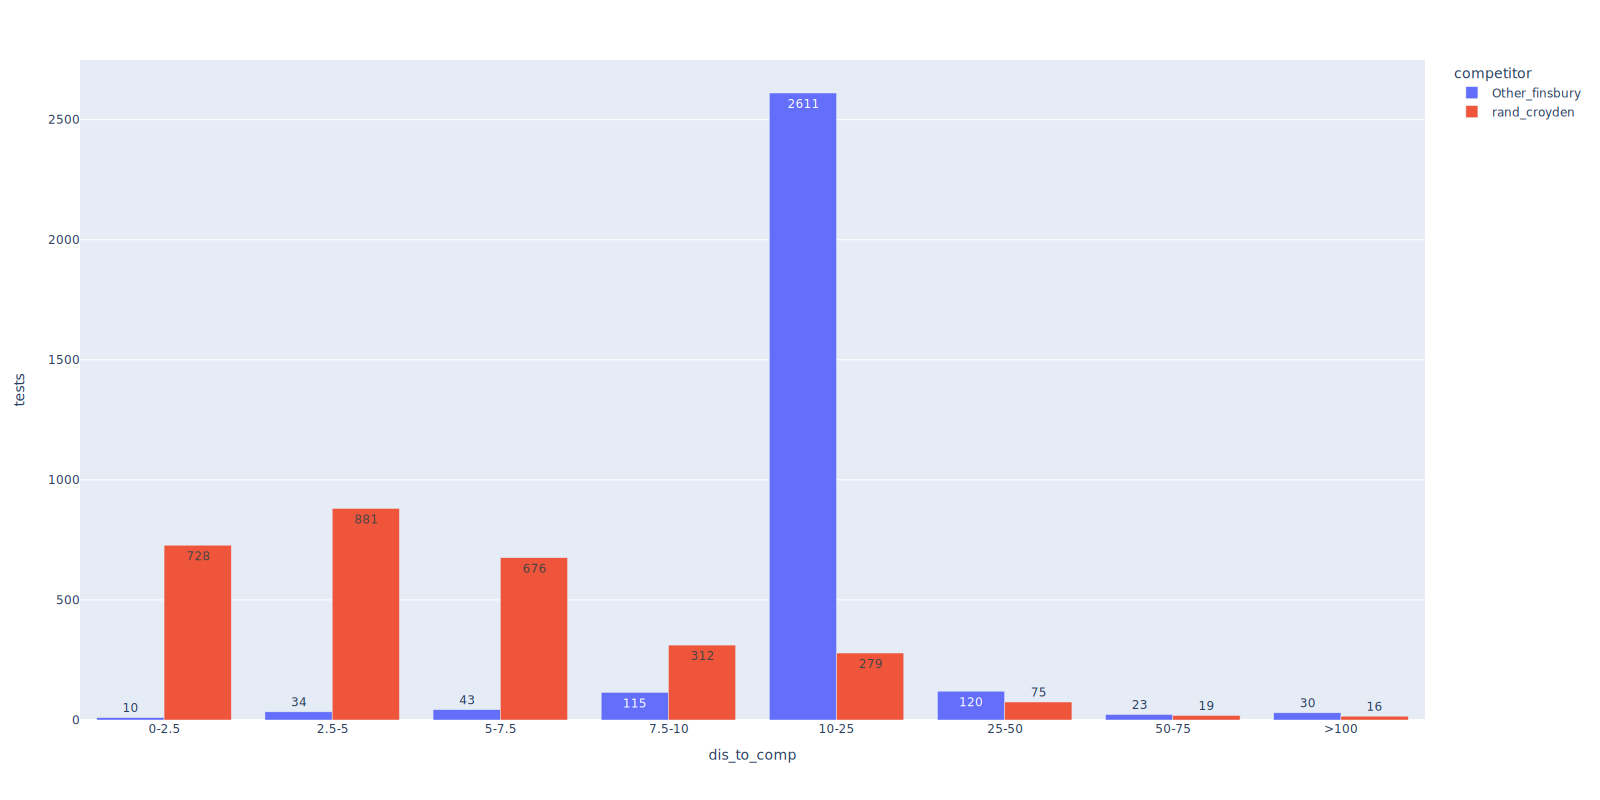

In [ ]:
(
    df_comp
    .assign(
    dis_fcts= lambda df_:
    np.where ( df_.dis_to_comp == "0-2.5", 2.5,    
    np.where ( df_.dis_to_comp == "2.5-5", 5,    
    np.where ( df_.dis_to_comp == "5-7.5", 7.5,
    np.where ( df_.dis_to_comp == "7.5-10", 10,
    np.where ( df_.dis_to_comp == "10-25", 25,
    np.where ( df_.dis_to_comp == "25-50", 50,
    np.where ( df_.dis_to_comp == "50-75", 75,
    np.where ( df_.dis_to_comp == "75-100", 100, 110
    ))))))))
    )
    .sort_values(["dis_fcts"], ascending=True)
    .plot.bar(
    x="dis_to_comp", 
    y= "tests", 
    color= "competitor", barmode= "group",
    text_auto = True,
    width= 1600, height = 800
    )
    ).show("svg")

Without Bayes' theorem:
We can use the information provided from london site customers and create the proportions of customers who bought tests by distance. 

The percentage of people within each range who are expected to buy a test based on past experience as an example.

        0-2.5 km	2.5-5 km
Rand	728 (25%)	279 (9%)
Fins	10 (25%)	2611(9%)

To determine how many customers will buy tests from each site, we can calculate the expected number of customers within each distance range who will buy a test, 
and then add them up for each site.

For rand:
Expected number of customers within 0-2.5 km range = 728 * 0.25 = 183
Expected number of customers within 2.5-5 km range = 279 * 0.09 = 25.3
Total expected number of customers = 183 + 25.3 = 208.3

For finsbury:
Expected number of customers within 0-2.5 km range = 10 * .25 = 2.51
Expected number of customers within 2.5-5 km range = 2611 * 0.09 = 236
Total expected number of customers = 2.51 + 236 = 238.51

Therefore, we expect rand to have 37.5 customers and Finsbury to have 238.5 customers.

In [ ]:
df_final=(
    df_comp            
    .merge(df_prob_dis, how="left", left_on="dis_to_comp", right_on= "dis_to_london" ).drop(columns= ["dis_to_london"])    
    .assign(        
        prob_buy_comp= lambda df_: df_.p_buy_dis_lon * df_.tests
        )   
     .groupby("competitor", as_index= False)
      .agg(     
           t=   ("prob_buy_comp", "sum")
           )
           )
df_final

,competitor,t
0,Other_finsbury,274.414936
1,rand_croyden,653.564300


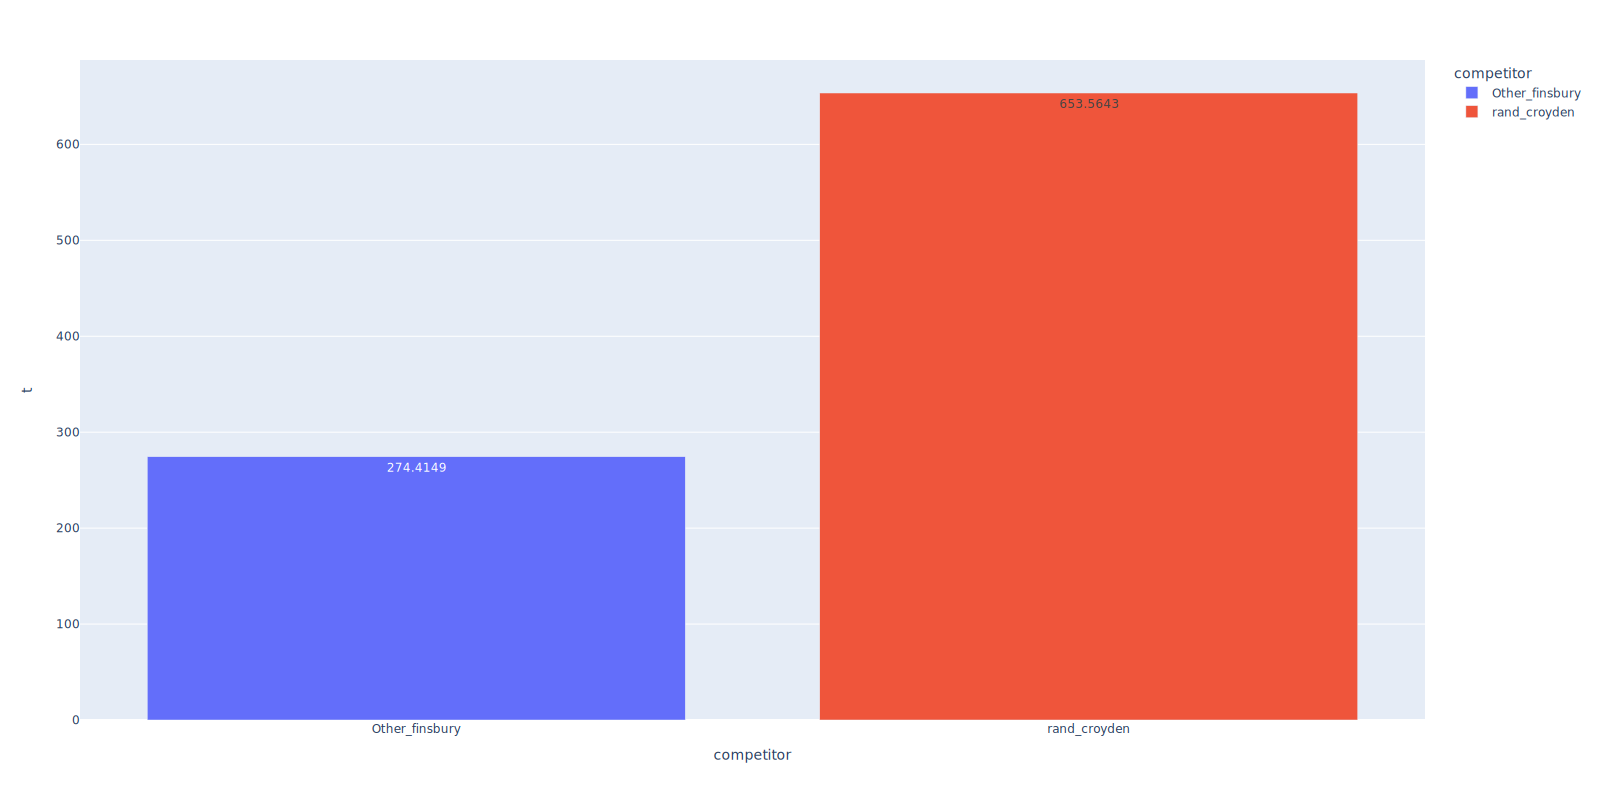

In [ ]:
df_final.plot.bar(
    x= "competitor", y="t", 
    color= "competitor",
    text_auto = True,
    width= 1600, height = 800).show("svg")